In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 nano

In [ ]:
Adj(1e-9,45,100000)

(144, 1296000000)

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

T list values

In [ ]:
Sr = 6048000000
sam = 336

tim = sam/Sr

In [ ]:
tim

5.5555555555555555e-08

In [ ]:
interval = tim*1e9 #nano

In [ ]:
interval

55.55555555555556

3 times appart

In [4]:
full_cycle = 11e-3
#loop_number = 100000
#part_cycle = full_cycle / loop_number
#part_cycle

In [ ]:
interval = 110 #nano
interval

110

In [ ]:
cycle_time = 11e-3
comp_time = cycle_time * 2
mod = 1/comp_time
mod

45.45454545454546

In [34]:
#Natterer data:
interval = 50 #nano

#mod and loop number

loop_number = round(full_cycle / (interval *1e-9)) 

loop_number 



220000

In [6]:
samples = int(6048000000 * 1.1e-7)
samples

665

In [ ]:
samples/48

13.854166666666666

In [7]:
sam = Granularity(samples)
sam

672

# AWG and Pulse files setup

In [ ]:
AWG_Settings_1nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':6048000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1nano'
}

In [ ]:
M8190A = VisaR(AWG_Settings_1nano,60000)

In [ ]:
M8190A.write('FREQ:RAST 6048000000')

21

In [ ]:
Initialization(M8190A,AWG_Settings_1nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [20]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude': 150,
    'Start time':25,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [21]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':50,
    'Start time':15,
    'End time':35,
    'Start Duration':5,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [22]:
ProbeB_1nano= {
    'Name':'ProbeB_1nano',
    'Amplitude':-50,
    'Start time':15,
    'End time':35,
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [23]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [24]:
PulseScheme_B_1nano =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

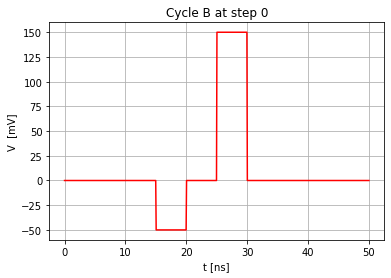

In [28]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_1nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1nano.jpeg {g} step.png'.format(g =  step, loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,30,interval,sam,0,30,AWG_Settings_1nano,'A')[0]

In [ ]:
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,30,interval,sam,0,30,AWG_Settings_1nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_45Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_31steps_45Hz_1nano_.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano= pickle.load(f)

In [ ]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 30'],sweeping_runb_1nano['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '100 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '45Hz'
}

In [ ]:
playingtime = 20

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1nano,sweeping_run_b_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings,220000)

Sequence loaded with the following segment data "1,100000,0,1,0,671,2,100000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 0 is 2.8329254241341526 V
Sequence loaded with the following segment data "1,100000,0,1,0,671,2,100000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 1 is 2.8379828256992496 V
Sequence loaded with the following segment data "1,100000,0,1,0,671,2,100000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 2 is 2.950371654061749 V
Sequence loaded with the following segment data "1,100000,0,1,0,671,2,100000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 3 is 2.9876038911083764 V
Sequence loaded with the following segment data "1,100000,0,1,0,671,2,100000,0,1,0,671" and the advancement method is COND


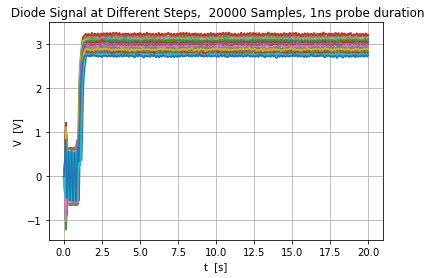

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-10,10,31)

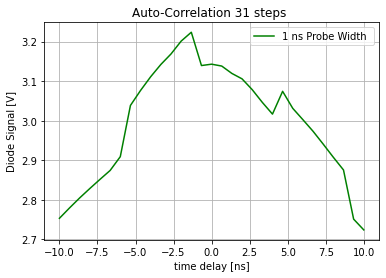

In [ ]:

fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1 ns Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 